<a href="https://colab.research.google.com/github/ShukrohBello/Machine-Learning-Zoomcamp/blob/main/02-regression/homework2_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Regression Homework for MLZoomcamp

> The goal of this homework is to create a regression model for predicting the car fuel efficiency (column 'fuel_efficiency_mpg').

In [2]:
import pandas as pd
import numpy as np

### Data Prep

In [3]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-13 08:58:39--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.01s   

2025-10-13 08:58:39 (82.8 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [4]:
df = pd.read_csv('/content/car_fuel_efficiency.csv')

In [5]:
df.head(5)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [6]:
#df.columns

In [7]:
#df.columns = df.columns.str.lower().str.replace(' ','_')


In [8]:
df.head(3)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341


In [9]:
df.dtypes

,0
engine_displacement,int64
num_cylinders,float64
horsepower,float64
vehicle_weight,float64
acceleration,float64
model_year,int64
origin,object
fuel_type,object
drivetrain,object
num_doors,float64


In [10]:
df.dtypes == 'object'

,0
engine_displacement,False
num_cylinders,False
horsepower,False
vehicle_weight,False
acceleration,False
model_year,False
origin,True
fuel_type,True
drivetrain,True
num_doors,False


In [11]:
df.dtypes[df.dtypes == 'object']

,0
origin,object
fuel_type,object
drivetrain,object


In [12]:
df.dtypes[df.dtypes == 'object'].index

Index(['origin', 'fuel_type', 'drivetrain'], dtype='object')

In [13]:
obj_strings = list(df.dtypes[df.dtypes == 'object'].index)
obj_strings

['origin', 'fuel_type', 'drivetrain']

In [14]:
for col in obj_strings:
  df[col] = df[col].str.lower().str.replace(' ','_')

In [15]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel_drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front-wheel_drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front-wheel_drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel_drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all-wheel_drive,2.0,12.488369


### Exploratory Data Analysis

In [16]:
for col in df.columns:
  print(col)
  print(df[col].head())
  print(df[col].unique()[:5])
  print(df[col].nunique())
  print()

engine_displacement
0    170
1    130
2    170
3    220
4    210
Name: engine_displacement, dtype: int64
[170 130 220 210 190]
36

num_cylinders
0    3.0
1    5.0
2    NaN
3    4.0
4    1.0
Name: num_cylinders, dtype: float64
[ 3.  5. nan  4.  1.]
14

horsepower
0    159.0
1     97.0
2     78.0
3      NaN
4    140.0
Name: horsepower, dtype: float64
[159.  97.  78.  nan 140.]
192

vehicle_weight
0    3413.433759
1    3149.664934
2    3079.038997
3    2542.392402
4    3460.870990
Name: vehicle_weight, dtype: float64
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704

acceleration
0    17.7
1    17.8
2    15.1
3    20.2
4    14.4
Name: acceleration, dtype: float64
[17.7 17.8 15.1 20.2 14.4]
162

model_year
0    2003
1    2007
2    2018
3    2009
4    2009
Name: model_year, dtype: int64
[2003 2007 2018 2009 2008]
24

origin
0    europe
1       usa
2    europe
3       usa
4    europe
Name: origin, dtype: object
['europe' 'usa' 'asia']
3

fuel_type
0    gasoline
1  

In [17]:
columns_to_keep = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'fuel_efficiency_mpg'
]

df_req = df[columns_to_keep]
display(df_req.head())

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

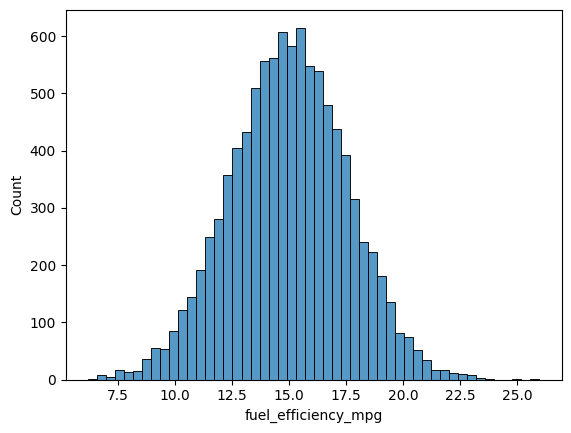

In [19]:
sns.histplot(df.fuel_efficiency_mpg, bins = 50)

#### Question 1: There's one column with missing values. What is it?

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [21]:
# Missing Values
df.isnull().sum()

,0
engine_displacement,0
num_cylinders,482
horsepower,708
vehicle_weight,0
acceleration,930
model_year,0
origin,0
fuel_type,0
drivetrain,0
num_doors,502


> horsepower is the column with missing values

In [22]:
df.shape

(9704, 11)

In [23]:
len(df)

9704

#### Question 2: What's the median (50% percentile) for variable 'horsepower'? [49, 99, 149, 199]

In [24]:
df_req.describe()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
count,9704.000000,8996.000000,9704.000000,9704.000000,9704.000000
mean,199.708368,149.657292,3001.280993,2011.484027,14.985243
std,49.455319,29.879555,497.894860,6.659808,2.556468
min,10.000000,37.000000,952.681761,2000.000000,6.200971
25%,170.000000,130.000000,2666.248985,2006.000000,13.267459
50%,200.000000,149.000000,2993.226296,2012.000000,15.006037
75%,230.000000,170.000000,3334.957039,2017.000000,16.707965
max,380.000000,271.000000,4739.077089,2023.000000,25.967222


In [25]:
# Initializing Descriptive Analysis
df_req.describe(percentiles = [.0, .25, .5, .75, .9, .95, .99, .1]).T

,count,mean,std,min,0%,10%,25%,50%,75%,90%,95%,99%,max
engine_displacement,9704.0,199.708368,49.455319,10.000000,10.000000,140.000000,170.000000,200.000000,230.000000,260.000000,280.000000,310.000000,380.000000
horsepower,8996.0,149.657292,29.879555,37.000000,37.000000,111.000000,130.000000,149.000000,170.000000,188.000000,200.000000,218.000000,271.000000
vehicle_weight,9704.0,3001.280993,497.894860,952.681761,952.681761,2366.705284,2666.248985,2993.226296,3334.957039,3639.429331,3819.762217,4177.957153,4739.077089
model_year,9704.0,2011.484027,6.659808,2000.000000,2000.000000,2002.000000,2006.000000,2012.000000,2017.000000,2021.000000,2022.000000,2023.000000,2023.000000
fuel_efficiency_mpg,9704.0,14.985243,2.556468,6.200971,6.200971,11.688767,13.267459,15.006037,16.707965,18.259461,19.150022,20.882064,25.967222


In [26]:
mid_hp = df_req['horsepower'].median()
print(f"The median (50th percentile) of horsepower is: {mid_hp}")

The median (50th percentile) of horsepower is: 149.0


In [27]:
import numpy as np

In [28]:
#OR  Median using numpy
mid = np.median(df_req['horsepower'])
mid

np.float64(nan)

In [29]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = int(n * 0.6)

In [30]:
n, n_val + n_test + n_train

(9704, 9702)

> Doesn't add up to a whole so will calculate n_train another way.

In [31]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [32]:
n, n_val + n_test + n_train

(9704, 9704)

In [33]:
#SHUFFLING THE DATASET - because the initial dataset is present
# sequentially which will affect the data split in (val, test, train)
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

In [34]:
# PREPARING THE DATASET
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [35]:
df_train.head(3)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
483,220,3.0,144.0,2535.887591,18.7,2009,usa,gasoline,all-wheel_drive,2.0,16.642943
7506,160,2.0,141.0,2741.170484,14.3,2019,asia,diesel,front-wheel_drive,2.0,16.298377
8795,230,3.0,155.0,2471.880237,NaN,2017,asia,diesel,front-wheel_drive,2.0,18.591822


In [36]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [37]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [38]:
df_train.head(3)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,220,3.0,144.0,2535.887591,18.7,2009,usa,gasoline,all-wheel_drive,2.0,16.642943
1,160,2.0,141.0,2741.170484,14.3,2019,asia,diesel,front-wheel_drive,2.0,16.298377
2,230,3.0,155.0,2471.880237,NaN,2017,asia,diesel,front-wheel_drive,2.0,18.591822


In [39]:
# PREPARING THE LABELS
y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

### Linear Regression

In [40]:
df_train.iloc[10]

,10
engine_displacement,240
num_cylinders,2.0
horsepower,159.0
vehicle_weight,2916.987921
acceleration,16.3
model_year,2001
origin,asia
fuel_type,gasoline
drivetrain,front-wheel_drive
num_doors,1.0


In [41]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [42]:
def linear_regression(xi):
  n = len(xi)

  pred = w0

  for j in range(n):
    pred = pred + xi[j] * w[j]

  return pred

In [43]:
linear_regression(xi)

12.312

In [44]:
np.expm1(12.312)

np.float64(222347.2221101062)

In [45]:
np.log1p(222347.2221101062)

np.float64(12.312)

### Linear Regression Vector Form

In [46]:
def dot(xi, w):
  n = len(xi)

  res = 0.0

  for j in range(n):
    res += xi[j] * w[j]

  return res

In [47]:
def linear_regression(xi):
  return w0 + dot(xi, w)

In [48]:
w_new =[w0] + w

In [49]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [50]:
def linear_regression(xi):
  xi = [1] + xi
  return dot(xi, w_new)

In [51]:
linear_regression(xi)

12.312

In [52]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new =[w0] + w #A vector

In [53]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 24, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X # A matrix

array([[   1,  148,   24, 1385],
       [   1,  132,   24, 2031],
       [   1,  453,   11,   86]])

In [54]:
X.dot(w_new)

array([12.38 , 13.512, 12.312])

In [55]:
def linear_regression(X):
  return X.dot(w_new)

In [56]:
linear_regression(X)

array([12.38 , 13.512, 12.312])

### Training a Linear Regression Model

In [57]:
def train_linear_regression(X, y):
    #ones = np.ones(X.shape[0])
    pass

In [161]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [59]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [60]:
#list(np.column_stack([ones, X]))
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [61]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [62]:
XTX = X.T.dot(X)

In [63]:
XTX_inv = np.linalg.inv(XTX) #Find the inverse of the matrix

In [64]:
#XTX.dot(XTX_inv)
#XTX.dot(XTX_inv).round(1)

In [65]:
w_full = XTX_inv.dot(X.T).dot(y)
w_full # Contains all the weights

array([ 2.58447541e+04, -1.60890647e+01, -1.99472549e+02, -1.22802883e+00])

In [66]:
w0 = w_full[0] #bias term
w = w_full[1:] # the rest - weights (w1, w2, w3)

In [67]:
w0, w

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

In [68]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [71]:
train_linear_regression(X, y) # Run the cell with X before the 1s
# And then run this cell.

(np.float64(25844.754055766753),
 array([ -16.08906468, -199.47254894,   -1.22802883]))

#### Baseline Regression Model

In [72]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,europe,gasoline,all-wheel_drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,usa,gasoline,front-wheel_drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,europe,gasoline,front-wheel_drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,usa,diesel,all-wheel_drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,europe,gasoline,all-wheel_drive,2.0,12.488369


In [73]:
df_train.dtypes

,0
engine_displacement,int64
num_cylinders,float64
horsepower,float64
vehicle_weight,float64
acceleration,float64
model_year,int64
origin,object
fuel_type,object
drivetrain,object
num_doors,float64


In [118]:
base = [
    'engine_displacement',
    'horsepower',
    'vehicle_weight',
    'model_year',
    'num_doors'
]
df_train[base]

,engine_displacement,horsepower,vehicle_weight,model_year,num_doors
0,220,144.0,2535.887591,2009,2.0
1,160,141.0,2741.170484,2019,2.0
2,230,155.0,2471.880237,2017,2.0
3,150,206.0,3748.164469,2015,1.0
4,300,111.0,2135.716359,2006,NaN
...,...,...,...,...,...
5819,260,139.0,2606.972984,2009,-1.0
5820,280,132.0,4004.214323,2014,2.0
5821,210,152.0,2500.175687,2020,0.0
5822,250,154.0,2254.313245,2002,2.0


In [75]:
X_train = df_train[base].values
X_train

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ]])

In [76]:
# df_train[base].fillna(0).isnull().sum()
X_train = df_train[base].fillna(0).values

In [77]:
w0, w = train_linear_regression(X_train, y_train)

In [78]:
X_train.dot(w)

array([-11.49210325, -12.53440231, -11.12851448, ..., -11.28195241,
       -10.04449008, -10.96171705])

In [79]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

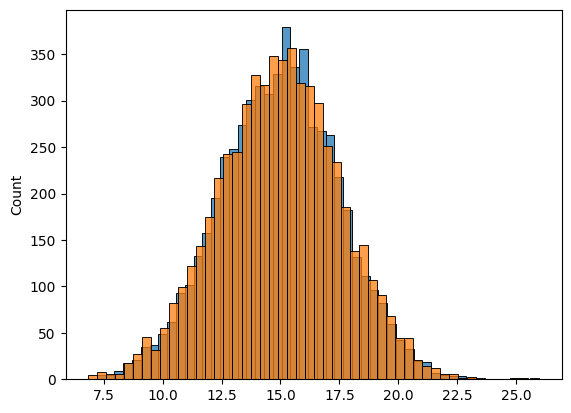

In [80]:
sns.histplot(y_pred)
sns.histplot(y_train)

### RMSE
>Evaluating Regression Models

In [81]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [82]:
rmse(y_train, y_pred)

np.float64(0.5202614265099076)

#### Validating the Model

In [83]:
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

In [84]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [85]:
# Training and Validation
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train) #Train

X_val = prepare_X(df_val) # Validation
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5173782638844466)

### Question 3: Fill NA mean vs zero

#### Replace with Mean

In [86]:
mean = df_train.horsepower.mean()

def prepare_X_mean(df):
    df_num = df[base]
    df_num = df_num.fillna(mean)
    X = df_num.values
    return X

X_train = prepare_X_mean(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X_mean(df_val)
y_pred = w_0 + X_val.dot(w)

rmse_mean = round(rmse(y_val, y_pred),2)
print(f"RMSE when filling with mean: {rmse_mean}")

RMSE when filling with mean: 0.46


#### Replace with Zero

In [87]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

rsme_zero = round(rmse(y_val, y_pred), 2)
print(f"RMSE when filling with zero: {rsme_zero}")

RMSE when filling with zero: 0.52


### Simple Feature Engineering

In [88]:
df_train.model_year.max()

2023

In [ ]:
2023 - df_train.model_year.head(5)

In [89]:
def prepare_X(df):
  df = df.copy()

  df['age'] = 2023 - df.model_year
  features = base + ['age']

  df_num = df[features]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [ ]:
X_train = prepare_X(df_train)

In [ ]:
df_train.dtypes

In [ ]:
df_train.columns

In [90]:
X_train = prepare_X(df_train)
X_train

array([[ 220.        ,  144.        , 2535.88759124, 2009.        ,
          14.        ],
       [ 160.        ,  141.        , 2741.17048439, 2019.        ,
           4.        ],
       [ 230.        ,  155.        , 2471.88023726, 2017.        ,
           6.        ],
       ...,
       [ 210.        ,  152.        , 2500.17568746, 2020.        ,
           3.        ],
       [ 250.        ,  154.        , 2254.31324473, 2002.        ,
          21.        ],
       [ 210.        ,  152.        , 2435.20360628, 2004.        ,
          19.        ]])

In [91]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(15.337462573049029)

<Axes: ylabel='Count'>

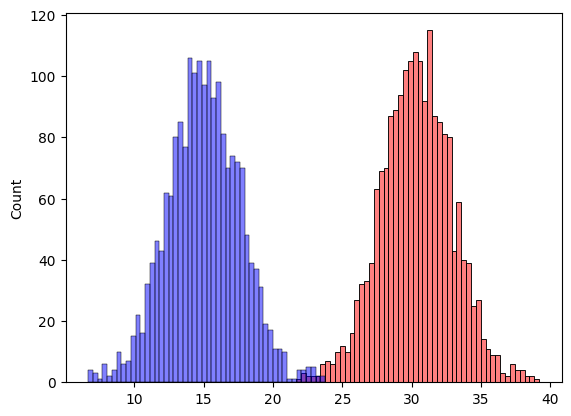

In [92]:
sns.histplot(y_pred, color = 'red', alpha=0.5, bins = 50)
sns.histplot(y_val, color = 'blue', alpha=0.5, bins = 50)

#### Categorical Variables

In [94]:
df_train.num_doors

,num_doors
0,2.0
1,2.0
2,2.0
3,1.0
4,NaN
...,...
5819,-1.0
5820,2.0
5821,0.0
5822,2.0


In [98]:
df_train['num_doors_2'] = (df_train.num_doors == 2).astype('int').head(3)


In [99]:
for v in [2,3,4]:
  df_train['num_doors_%s' % v] = (df_train.num_doors == v).astype('int')

In [101]:
df_train.head(3)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,num_doors_2,num_doors_3,num_doors_4
0,220,3.0,144.0,2535.887591,18.7,2009,usa,gasoline,all-wheel_drive,2.0,1,0,0
1,160,2.0,141.0,2741.170484,14.3,2019,asia,diesel,front-wheel_drive,2.0,1,0,0
2,230,3.0,155.0,2471.880237,NaN,2017,asia,diesel,front-wheel_drive,2.0,1,0,0


In [111]:
del df_train['num_doors_2']
del df_train['num_doors_3']
del df_train['num_doors_4']

In [112]:
'num_doors_%s' % 2

'num_doors_2'

In [120]:
def prepare_X(df):
  df = df.copy()
  features = base.copy()

  df['age'] = 2023 - df.model_year
  features.append('age')

  for v in [2,3,4]:
    df['num_doors_%s' % v] = (df.num_doors == v).astype('int')
    features.append('num_doors_%s' % v)

  df_num = df[features]
  df_num = df_num.fillna(0)
  X = df_num.values

  return X

In [122]:
prepare_X(df_train)

array([[2.20000000e+02, 1.44000000e+02, 2.53588759e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.60000000e+02, 1.41000000e+02, 2.74117048e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.30000000e+02, 1.55000000e+02, 2.47188024e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.10000000e+02, 1.52000000e+02, 2.50017569e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.50000000e+02, 1.54000000e+02, 2.25431324e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.10000000e+02, 1.52000000e+02, 2.43520361e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [123]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

LinAlgError: Singular matrix

### Regularization

### Question 4
    Now let's train a regularized linear regression.
    For this question, fill the NAs with 0.
    Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
    Use RMSE to evaluate the model on the validation dataset.
    Round the RMSE scores to 2 decimal digits.
    Which r gives the best RMSE?
    If there are multiple options, select the smallest r.
    Options:
      0
      0.01
      1
      10
      100

### Best Regularization

In [130]:
###FUNCTION FOR TRAINING LINEAR REGRESSION:
def train_linear_regression_reg(X, y, r=0.000):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0]) #regularization
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [131]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.000)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

LinAlgError: Singular matrix

In [136]:
# Tuning the Model

for r in [0, 0.01, 1, 10, 100]:

  X_train = prepare_X(df_train)
  w0, w = train_linear_regression_reg(X_train, y_train, r=r)
  y_pred = w_0 + X_val.dot(w)
  rmse_val = rmse(y_val, y_pred)

  print(r, w0, rmse_val)

LinAlgError: Singular matrix

### Using the Model

In [140]:
df_full_train = pd.concat([df_train, df_val])

In [142]:
df_full_train = df_full_train.reset_index(drop=True)

In [144]:
df_full_train.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,220,3.0,144.0,2535.887591,18.7,2009,usa,gasoline,all-wheel_drive,2.0
1,160,2.0,141.0,2741.170484,14.3,2019,asia,diesel,front-wheel_drive,2.0
2,230,3.0,155.0,2471.880237,NaN,2017,asia,diesel,front-wheel_drive,2.0
3,150,3.0,206.0,3748.164469,15.5,2015,usa,gasoline,all-wheel_drive,1.0
4,300,4.0,111.0,2135.716359,16.9,2006,usa,gasoline,all-wheel_drive,NaN


In [145]:
X_full_train = prepare_X(df_full_train)

In [146]:
X_full_train

array([[2.20000000e+02, 1.44000000e+02, 2.53588759e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.60000000e+02, 1.41000000e+02, 2.74117048e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.30000000e+02, 1.55000000e+02, 2.47188024e+03, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.30000000e+02, 2.02000000e+02, 3.30300069e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.20000000e+02, 1.69000000e+02, 3.29342025e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+02, 1.17000000e+02, 2.69278129e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [147]:
y_full_train = np.concatenate([y_train, y_val])

In [148]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [149]:
w

array([ 0.00011436,  0.00364244, -0.00501323,  0.01458668,  0.00024445,
        0.01358752,  0.04813773, -0.04431675,  0.        ])

In [150]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)
score

np.float64(0.516382612636975)

In [152]:
car = df_test.iloc[20].to_dict()
car

{'engine_displacement': 160,
 'num_cylinders': 4.0,
 'horsepower': 125.0,
 'vehicle_weight': 3317.04204639791,
 'acceleration': 19.0,
 'model_year': 2018,
 'origin': 'europe',
 'fuel_type': 'diesel',
 'drivetrain': 'front-wheel_drive',
 'num_doors': -1.0}

In [153]:
df_small = pd.DataFrame([car])
df_small

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,160,4.0,125.0,3317.042046,19.0,2018,europe,diesel,front-wheel_drive,-1.0


In [154]:
X_small = prepare_X(df_small)

In [155]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

np.float64(13.348136120662403)

In [156]:
np.expm1(y_pred)

np.float64(626644.4070625684)

In [157]:
y_test[20]

np.float64(12.77905629316582)

In [158]:
np.expm1(y_test[20])

np.float64(354709.16315333516)

### Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))

    What's the value of std?

    0.001
    0.006
    0.060
    0.600
> Note: *Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.*

In [160]:
rmses = []

for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = df_train.fuel_efficiency_mpg.values
    y_val = df_val.fuel_efficiency_mpg.values
    y_test = df_test.fuel_efficiency_mpg.values

    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X_train = prepare_X(df_train) # fillna_value=0)
    w_0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val) #, fillna_value=0)
    y_pred = w_0 + X_val.dot(w)

    result = rmse(y_val, y_pred)
    print(s, result)

    rmses.append(result)

0 11.551521614293597
1 106.7664588867967


LinAlgError: Singular matrix